In [7]:

from efficientnet.tfkeras import EfficientNetB7

# Base EfficientNetB7 model
model = Sequential([
    EfficientNetB7(
        include_top=False,
        weights="imagenet",
        input_shape=(224, 224, 3),  # Adjust input shape based on EfficientNetB7 requirements
        pooling=None,
    ),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(12, activation='softmax')
])

# Freeze the layers in the EfficientNetB7 model
for layer in model.layers[0].layers:
    layer.trainable = False

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnet-b7 (Functiona  (None, 7, 7, 2560)        64097680  
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 125440)            0         
                                                                 
 dense (Dense)               (None, 128)               16056448  
                                                                 
 dense_1 (Dense)             (None, 12)                1548      
                                                                 
Total params: 80155676 (305.77 MB)
Trainable params: 16057996 (61.26 MB)
Non-trainable params: 64097680 (244.51 MB)
_________________________________________________________________


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import tensorflow as tf
import cv2
import skimage.io
from skimage.transform import resize
from imgaug import augmenters as iaa
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer,LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,GlobalAveragePooling2D,Concatenate, ReLU, LeakyReLU,Reshape, Lambda
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import metrics
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.initializers import glorot_uniform
from tqdm import tqdm
import imgaug as ia
from imgaug import augmenters as iaa
from PIL import Image
import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\keras\src\backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [3]:
import numpy as np
import os
import random
import cv2
import matplotlib.pyplot as plt
#from google.colab import drive
from PIL import Image
from numpy import asarray

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Activation,Flatten
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [5]:
import tarfile
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import get_file

In [6]:
# Create a Sequential model for data augmentation
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.1),
        layers.experimental.preprocessing.RandomContrast(0.2),
        layers.GaussianNoise(0.1),
        layers.experimental.preprocessing.RandomCrop(224, 224),


        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.2),
        layers.experimental.preprocessing.RandomZoom(0.2),
        layers.experimental.preprocessing.RandomContrast(0.2),
        layers.GaussianNoise(0.2),
        layers.experimental.preprocessing.RandomCrop(224, 224),


        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),

        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),

        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.experimental.preprocessing.RandomContrast(0.4),
        layers.GaussianNoise(0.3),
        layers.experimental.preprocessing.RandomCrop(224, 224),


    ]
)

# The rest of the code remains the same as in the previous examples.


In [7]:
from tensorflow.keras.applications import VGG16

# Base VGG16 model
model = Sequential([
    VGG16(
        include_top=False,
        weights="imagenet",
        input_shape=(224, 224, 3),
        pooling=None,
    ),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(12, activation='softmax')
])

# Freeze the layers in the VGG16 model
for layer in model.layers[0].layers:
    layer.trainable = False

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dense_1 (Dense)             (None, 12)                1548      
                                                                 
Total params: 17927628 (68.39 MB)
Trainable params: 3212940 (12.26 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [8]:
dir = r"C:\Users\User\Desktop\dataset\dataset"
lvl = [
    "battery",
    "biological",
    "brown-glass",
    "cardboard",
    "clothes",
    "glass",
    "green-glass",
    "metal",
    "paper",
    "plastic",
    "shoes",
    "white-glass",
]

len(lvl)

12

In [9]:
data = []
cnt = 0
for l in lvl:
    fld = os.path.join(dir,l)
    label = lvl.index(l)
    print(fld)
    cnt=0
    for img in os.listdir(fld):
        jpg = os.path.join(fld,img)
        cnt+=cnt+1;
        i_a = cv2.imread(jpg)#image -> array

        i_a = cv2.resize(i_a,(224,224))
        data.append([i_a,label])
len(data)
       # plt.imshow(i_a)
       # break

C:\Users\User\Desktop\dataset\dataset\battery
C:\Users\User\Desktop\dataset\dataset\biological
C:\Users\User\Desktop\dataset\dataset\brown-glass
C:\Users\User\Desktop\dataset\dataset\cardboard
C:\Users\User\Desktop\dataset\dataset\clothes
C:\Users\User\Desktop\dataset\dataset\glass
C:\Users\User\Desktop\dataset\dataset\green-glass
C:\Users\User\Desktop\dataset\dataset\metal
C:\Users\User\Desktop\dataset\dataset\paper
C:\Users\User\Desktop\dataset\dataset\plastic
C:\Users\User\Desktop\dataset\dataset\shoes
C:\Users\User\Desktop\dataset\dataset\white-glass


6000

In [10]:
len(lvl)

12

In [11]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [12]:
x = []
y = []

for i,j in data:
    x.append(i)
    y.append(j)

In [13]:
x = np.array(x)
y = np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

In [14]:
x_train.shape

(4800, 224, 224, 3)

In [15]:

x_train = x_train/255
x_test = x_test/255

In [16]:
x_train.shape

(4800, 224, 224, 3)

In [17]:
x_test.shape
y_test.shape

(1200,)

In [18]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
import numpy as np

def resize_images(images, target_size=(224, 224)):
    resized_images = []
    for img_array in images:
        img = array_to_img(img_array)
        img = img.resize(target_size)
        img_array_resized = img_to_array(img)
        resized_images.append(img_array_resized)
    return np.array(resized_images)
# Resize training and testing images
x_train_resized = resize_images(x_train)
x_test_resized = resize_images(x_test)


history = model.fit(x_train_resized, y_train, validation_data=(x_test_resized, y_test), batch_size=32, epochs=10, verbose=1)


Epoch 1/10


150/150 [==============================] - 306s 2s/step - loss: 3.2259 - accuracy: 0.6162 - val_loss: 1.5061 - val_accuracy: 0.6825
Epoch 2/10
150/150 [==============================] - 304s 2s/step - loss: 0.9187 - accuracy: 0.7727 - val_loss: 1.3146 - val_accuracy: 0.7300
Epoch 3/10
150/150 [==============================] - 301s 2s/step - loss: 0.6195 - accuracy: 0.8117 - val_loss: 1.2193 - val_accuracy: 0.7458
Epoch 4/10
150/150 [==============================] - 301s 2s/step - loss: 0.4674 - accuracy: 0.8490 - val_loss: 1.3109 - val_accuracy: 0.7450
Epoch 5/10
150/150 [==============================] - 301s 2s/step - loss: 0.4283 - accuracy: 0.8621 - val_loss: 1.1225 - val_accuracy: 0.7592
Epoch 6/10
150/150 [==============================] - 304s 2s/step - loss: 0.3555 - accuracy: 0.8763 - val_loss: 1.4187 - val_accuracy: 0.7475
Epoch 7/10
150/150 [==============================] - 304s 2s/step - loss: 0.2949 - accuracy: 0.8863 - val_loss: 1.1375 - val_accuracy: 0.78

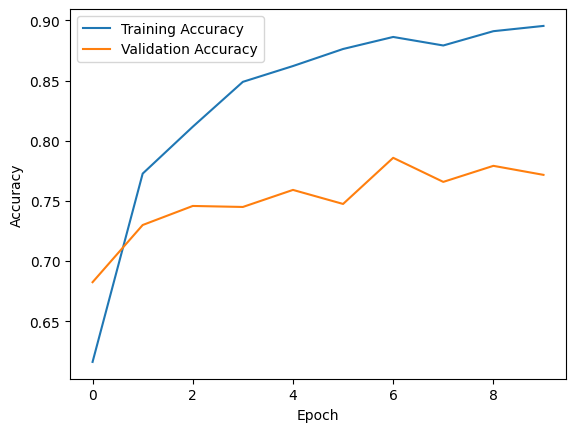

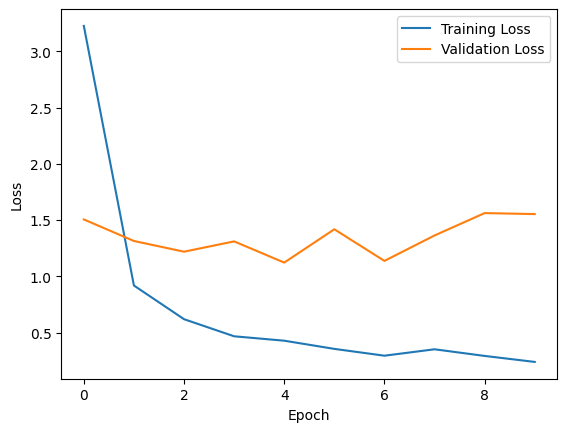

In [20]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [24]:
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix , classification_report
import pandas as pd

In [25]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names,
    )
    x = df_cm
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [26]:
y_test

array([ 2,  2,  4,  0, 11, 11,  5,  4,  1, 11,  2,  2,  8,  5,  3,  5,  5,
        5,  6,  1, 10,  3,  2,  5,  5, 11,  1, 10, 11, 11,  6, 11,  7,  1,
       10,  9,  8,  3,  0, 10,  0, 10, 10,  8, 10,  4, 11,  5, 11,  6,  8,
        9,  2,  6,  9,  9, 11,  1,  7,  4,  0,  4,  9, 10,  9,  4,  3,  9,
        8,  6,  7,  4,  0,  3,  7,  8, 11,  1,  5, 10,  2,  4,  4,  2,  1,
        8,  4,  5,  0,  6, 11,  6, 10,  7,  5,  4,  0, 11, 11,  1, 11, 11,
        3,  5,  7, 11,  0,  3,  9, 10, 11,  9,  0,  1,  4,  5, 11,  4,  6,
        8, 10,  3,  4,  3,  1,  1,  8,  3,  8,  0, 10, 11, 10,  4,  7, 11,
        9,  5,  2,  9,  8,  1,  1,  2, 11,  1, 11,  8,  6,  6, 10,  3, 10,
        7, 11,  6,  8,  8,  7,  5,  6,  6,  1,  6,  3,  3,  9, 11,  7,  5,
        8,  3,  1,  6,  0,  2, 11,  8,  4, 11,  6,  6,  3,  1, 11,  3,  2,
        9,  8,  8,  9, 10,  5,  2,  8,  4,  8,  2,  4,  6, 11,  9,  4,  6,
        5,  0, 11,  2,  5,  9,  1, 10,  3,  1,  0,  4,  7,  7,  3,  7,  9,
        5, 11,  0, 11, 11

In [27]:
y_pred = model.predict(x_test)
y_pred

38/38 [==============================] - 61s 2s/step


array([[0.05828519, 0.05862691, 0.08921867, 0.06309989, 0.05569699,
        0.10772418, 0.0820577 , 0.12380823, 0.08123213, 0.13526101,
        0.06177563, 0.0832135 ],
       [0.07008927, 0.06131282, 0.0843702 , 0.07101094, 0.06775574,
        0.09867507, 0.07817851, 0.11584488, 0.07827917, 0.12632997,
        0.07179539, 0.07635804],
       [0.09686953, 0.05381882, 0.05121687, 0.03652313, 0.14794572,
        0.06328581, 0.04536787, 0.07608453, 0.07802972, 0.13063492,
        0.16641827, 0.05380474],
       [0.06172337, 0.05895309, 0.07217064, 0.0823122 , 0.06586628,
        0.10453729, 0.07505337, 0.1036093 , 0.08736444, 0.14127307,
        0.07216019, 0.07497674],
       [0.05701359, 0.05828506, 0.08974122, 0.06220024, 0.05440878,
        0.10875671, 0.08246696, 0.12468681, 0.08152931, 0.13624975,
        0.06066766, 0.08399388],
       [0.05031804, 0.05629075, 0.09248849, 0.05729566, 0.04766218,
        0.11441504, 0.08458398, 0.12938645, 0.08300937, 0.14155206,
        0.05473472,

In [28]:
y_classes = [np.argmax(element) for element in y_pred]

In [29]:
# Convert y_test to integer array (if it contains floats)

# Print the first 5 actual and predicted class labels
for u, v in zip(y_test[:12], y_classes[:12]):
    actual_class = lvl[u]
    predicted_class = lvl[v]
    print("Actual: {actual_class} -> Predicted: {predicted_class}")

Actual: {actual_class} -> Predicted: {predicted_class}
Actual: {actual_class} -> Predicted: {predicted_class}
Actual: {actual_class} -> Predicted: {predicted_class}
Actual: {actual_class} -> Predicted: {predicted_class}
Actual: {actual_class} -> Predicted: {predicted_class}
Actual: {actual_class} -> Predicted: {predicted_class}
Actual: {actual_class} -> Predicted: {predicted_class}
Actual: {actual_class} -> Predicted: {predicted_class}
Actual: {actual_class} -> Predicted: {predicted_class}
Actual: {actual_class} -> Predicted: {predicted_class}
Actual: {actual_class} -> Predicted: {predicted_class}
Actual: {actual_class} -> Predicted: {predicted_class}


In [30]:
y_true=[lvl[i] for i in y_test]
y_pd = [lvl[i] for i in y_classes]

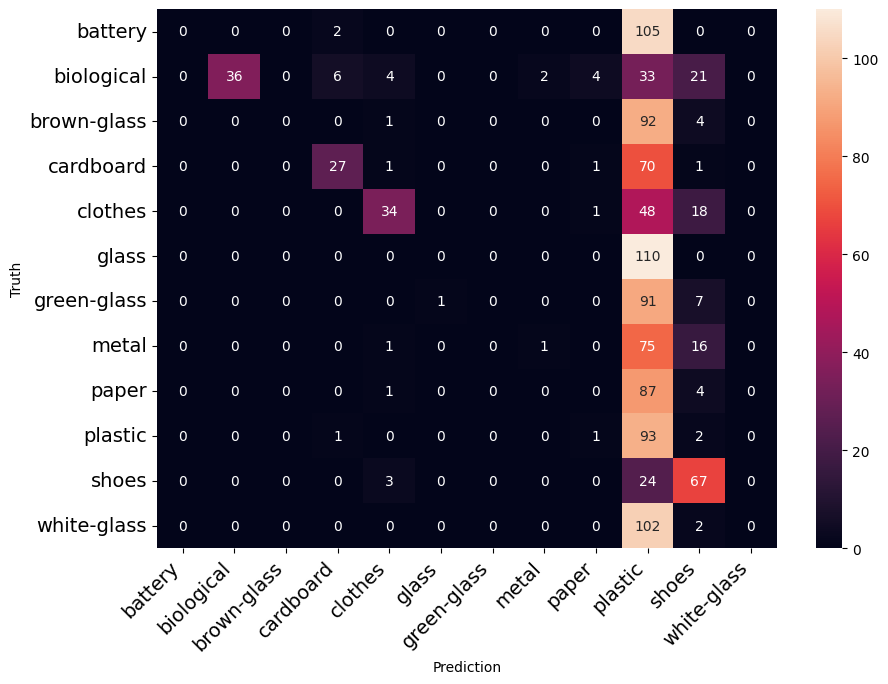

In [31]:
cm = confusion_matrix(y_true,y_pd,labels = lvl)

print_confusion_matrix(cm,lvl)

In [32]:
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_true, y_pd))

              precision    recall  f1-score   support

     battery       0.00      0.00      0.00       107
  biological       1.00      0.34      0.51       106
 brown-glass       0.00      0.00      0.00        97
   cardboard       0.75      0.27      0.40       100
     clothes       0.76      0.34      0.47       101
       glass       0.00      0.00      0.00       110
 green-glass       0.00      0.00      0.00        99
       metal       0.33      0.01      0.02        93
       paper       0.00      0.00      0.00        92
     plastic       0.10      0.96      0.18        97
       shoes       0.47      0.71      0.57        94
 white-glass       0.00      0.00      0.00       104

    accuracy                           0.21      1200
   macro avg       0.28      0.22      0.18      1200
weighted avg       0.29      0.21      0.18      1200



c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif